**Chapter 1 – The Machine Learning landscape**

In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import seaborn as sns

%matplotlib inline

In [56]:
odbi = pd.read_csv('../data/oecd_bli_2015.csv', thousands = ',')
gdpc = pd.read_csv('../data/gdp_per_capita.csv', thousands = ',',delimiter ='\t',encoding = 'latin1',na_values = 'n/a')
odbi.head(3), gdpc.head(3)

(  LOCATION    Country INDICATOR                           Indicator MEASURE  \
 0      AUS  Australia   HO_BASE  Dwellings without basic facilities       L   
 1      AUT    Austria   HO_BASE  Dwellings without basic facilities       L   
 2      BEL    Belgium   HO_BASE  Dwellings without basic facilities       L   
 
   Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
 0   Value        TOT      Total        PC  Percentage               0   
 1   Value        TOT      Total        PC  Percentage               0   
 2   Value        TOT      Total        PC  Percentage               0   
 
   PowerCode  Reference Period Code  Reference Period  Value Flag Codes  \
 0     units                    NaN               NaN    1.1          E   
 1     units                    NaN               NaN    1.0        NaN   
 2     units                    NaN               NaN    2.0        NaN   
 
              Flags  
 0  Estimated value  
 1              NaN  
 2          

In [66]:
odbi.shape, gdpc.shape

((3292, 17), (190, 7))

In [54]:
# Prepare oecd 2015 dataset 
odbi = odbi.loc[odbi["INEQUALITY"] == "TOT"]
odbi = odbi.pivot(index="Country", columns="Indicator", values="Value")

# Prepare gdp dataset
gdpc.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdpc.set_index('Country',inplace = True)

In [5]:
odbi.head(3), gdpc.head(3)

(Indicator  Air pollution  Assault rate  Consultation on rule-making  \
 Country                                                               
 Australia           13.0           2.1                         10.5   
 Austria             27.0           3.4                          7.1   
 Belgium             21.0           6.6                          4.5   
 
 Indicator  Dwellings without basic facilities  Educational attainment  \
 Country                                                                 
 Australia                                 1.1                    76.0   
 Austria                                   1.0                    83.0   
 Belgium                                   2.0                    72.0   
 
 Indicator  Employees working very long hours  Employment rate  Homicide rate  \
 Country                                                                        
 Australia                              14.02             72.0            0.8   
 Austria               

In [6]:
# Merge odbi and gdpc dataset
stats_ful_contry = pd.merge(left = odbi, right = gdpc,left_index = True, right_index = True)
stats_ful_contry.sort_values(by = 'GDP per capita', inplace = True)

# remove irrelevant counties
keep_indices = list(set(range(36)) - set([0,1,6,8,33,34,35]))
stats_ful_contry = stats_ful_contry[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

In [7]:
stats_ful_contry.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


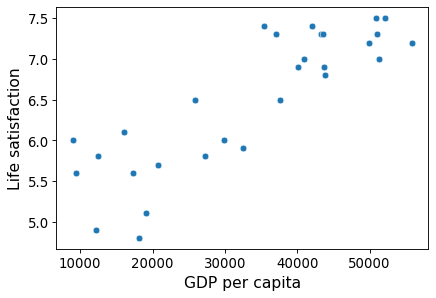

In [8]:
 # Visualization
_, ax = plt.subplots(figsize=(6, 4), dpi=80)
g = sns.scatterplot(
    x="GDP per capita", y="Life satisfaction", data=stats_ful_contry, ax=ax
)

In [9]:
X = np.c_[stats_ful_contry['GDP per capita']]
y = np.c_[stats_ful_contry['Life satisfaction']]

# Select  linear , KNN model by sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

models = [LinearRegression(),KNeighborsRegressor(n_neighbors=3)]

# Make a prediction for Cyprus:22587
X_new = [[22587]]  # Cyprus' GDP per capita

results = []
for m in models:
    m.fit(X,y)
    results.append(m.predict(X_new))
    print(results)

[array([[5.96242338]])]
[array([[5.96242338]]), array([[5.76666667]])]


In [10]:
odbi["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

In [11]:
gdpc.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [12]:
stats_ful_contry= pd.merge(left = odbi,right=gdpc,left_index=True,right_index=True)
stats_ful_contry.sort_values(by = 'GDP per capita', inplace=True)

In [13]:
stats_ful_contry.shape

(36, 30)

In [14]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = stats_ful_contry[["GDP per capita", "Life satisfaction"]].iloc[
    keep_indices
]
missing_data = stats_ful_contry[["GDP per capita", "Life satisfaction"]].iloc[
    remove_indices
]


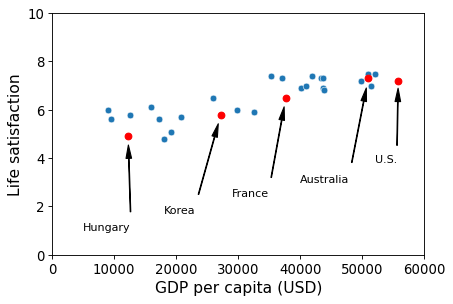

In [44]:
_, ax = plt.subplots(figsize=(6, 4), dpi=80)
g = sns.scatterplot(x="GDP per capita", y="Life satisfaction", data=sample_data, ax=ax)

position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country  # abbr. for US
    plt.annotate(
        country,
        xy=(pos_data_x, pos_data_y),
        xytext=pos_text,
        arrowprops=dict(facecolor="black", width=0.5, shrink=0.1, headwidth=5),
    )
    plt.plot(pos_data_x, pos_data_y, "ro")
    
plt.xlabel("GDP per capita (USD)") # essential
plt.axis([0, 60000, 0, 10])
plt.show()


In [31]:
# save data
sample_data.to_csv("../data/lifesat.csv")

In [39]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


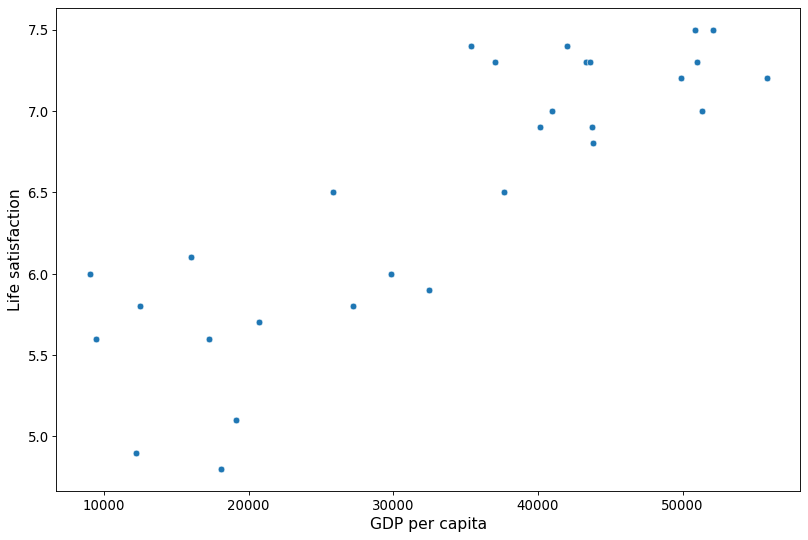

In [38]:
 Visualization
_, ax = plt.subplots(figsize=(12, 8), dpi=80)

# scatter plot
g = sns.scatterplot(
    x="GDP per capita", y="Life satisfaction", data=sample_data, ax=ax
)



